# 1.importing libraries:

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
data=pd.read_csv("/content/haberman.csv",header = None, names=['age', 'year_of_treatment', 'positive_lymph_nodes', 'survival_5yr'])

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [9]:
data.shape # checking the shape of the data

(306, 4)

In [10]:
data.isnull().sum() # checking for missing values # no missing value

age                     0
year_of_treatment       0
positive_lymph_nodes    0
survival_5yr            0
dtype: int64

In [11]:
data.info() # all the columns are int datatype, no categorical value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   306 non-null    int64
 1   year_of_treatment     306 non-null    int64
 2   positive_lymph_nodes  306 non-null    int64
 3   survival_5yr          306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


**Feature information**

Copied from prem's kaggle notebook:

age - It represents age of patient at the time of operation(numerical)

year_of_treatment - It represents year of operation(numerical)

positive_lymph_nodes - It tells no of +ve auxillry node detected(numerical)

survival_5yr - Survival status 1 = the patient survived 5 years or longer 2 = 

the patient died within 5 year

In [12]:
data.head() # checking how does my data look like

,age,year_of_treatment,positive_lymph_nodes,survival_5yr
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [13]:
data['survival_5yr'].value_counts() # kind of imbalanced dataset, more people survived

1    225
2     81
Name: survival_5yr, dtype: int64

In [14]:
# Lets try to find no of unique value in each column

col = data.columns
for i in col:
    print(i,":", len(data[i].value_counts()))
# Comparitevely less unique values in year_of_treatment 
# it will be intresting to see what impact it is having on target variable

age : 49
year_of_treatment : 12
positive_lymph_nodes : 31
survival_5yr : 2


**Objective**

Our objective is to decide whether based on the data we have, if we can classify the patients will survive or not 

In [15]:
data.describe()

,age,year_of_treatment,positive_lymph_nodes,survival_5yr
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [16]:
data['survival_5yr'].replace(to_replace = 1, value ="yes", inplace = True)
data['survival_5yr'].replace(to_replace = 2, value ="no", inplace = True)
data['survival_5yr'].value_counts()

yes    225
no      81
Name: survival_5yr, dtype: int64

# Lets start with visulaization

**Univariate analysis**

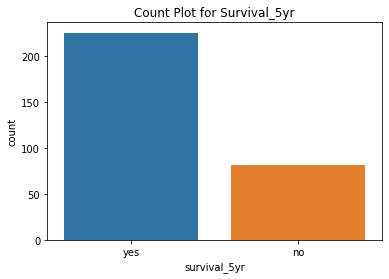

In [17]:
sns.countplot(x = data['survival_5yr']).set_title('Count Plot for Survival_5yr') # again, shows us that we have imbalanced dataset
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


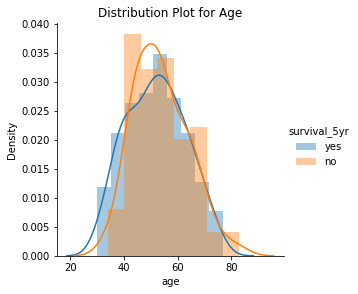

In [18]:
sns.FacetGrid(data, hue = 'survival_5yr', height = 4, ) \
    .map(sns.distplot, "age") \
    .add_legend() \
    .set_axis_labels("age", "Density")
plt.title('Distribution Plot for Age', y=1.05, fontsize = 12)
plt.show()
# Looking at the distribution plot using age, not much can be inferred

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


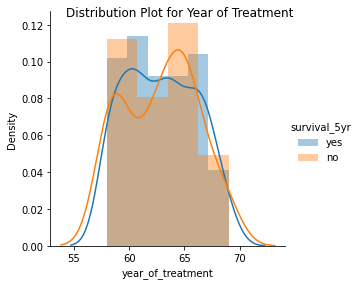

In [19]:
sns.FacetGrid(data, hue = 'survival_5yr', height = 4) \
    .map(sns.distplot, 'year_of_treatment') \
    .add_legend() \
    .set_axis_labels("year_of_treatment", "Density") \
    .fig.suptitle('Distribution Plot for Year of Treatment')
plt.show()
# Looking at the distribution plot using year_of_treatment, not much can be inferred

**Bivariate analysis**

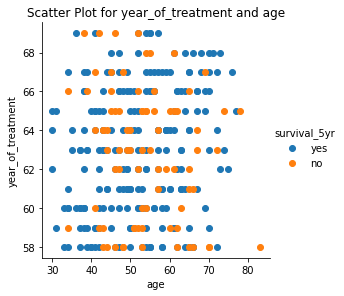

In [20]:
# Lets first plot a 2-D scatter plot
sns.FacetGrid(data, hue = 'survival_5yr', height = 4) \
    .map(plt.scatter, "age", "year_of_treatment") \
    .add_legend() 
plt.title('Scatter Plot for year_of_treatment and age', y=1.05, fontsize = 12)
plt.show()
# Clearly based on this two variable we cant have a decision boundary

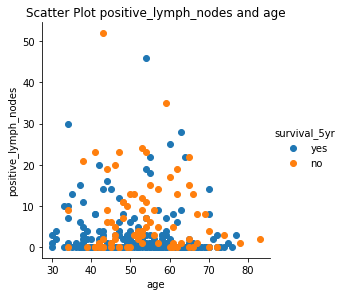

In [21]:
# Lets first plot a 2-D scatter plot
sns.FacetGrid(data, hue = 'survival_5yr', height = 4) \
    .map(plt.scatter, "age", "positive_lymph_nodes") \
    .add_legend()
plt.title('Scatter Plot positive_lymph_nodes and age', y=1.05, fontsize = 12)
plt.show()
# Clearly based on this two variable we cant have a decision boundary

**Multi-variate analysis**

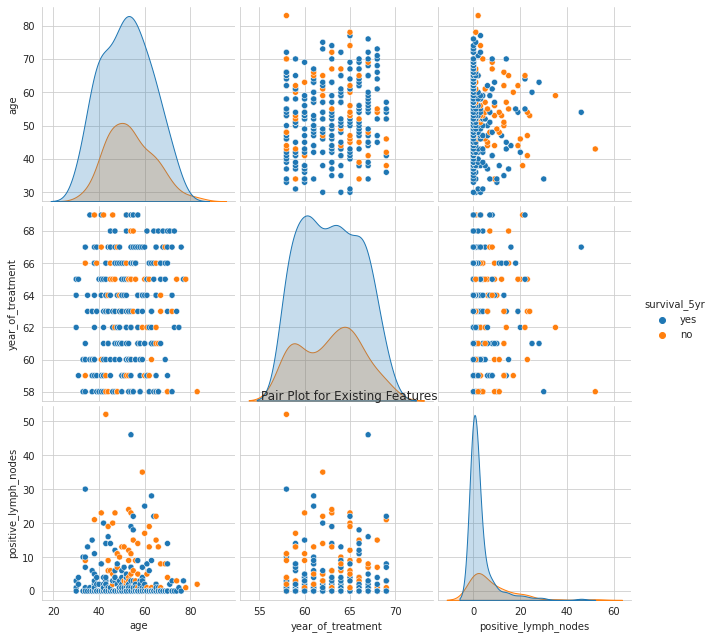

'Again not a clear decision boundary based on this plot, but we can somewhat draw a non-linear decision boundary based on age and positive_lymph node variable'

In [22]:
# Now lets take a look at pairplot
sns.set_style("whitegrid")
sns.pairplot(data, hue = "survival_5yr", height =3)
plt.title('Pair Plot for Existing Features', y=2.2,fontsize = 12, loc = 'right', x= 0.001)
plt.show()
'''Again not a clear decision boundary based on this plot, but we can somewhat draw a non-linear decision boundary based on age and positive_lymph node variable'''

**Box Plot**

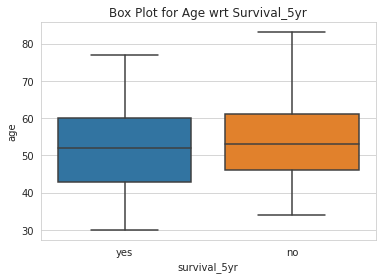

In [23]:
# Lets take a look using boxplot

sns.boxplot(x= 'survival_5yr', y = 'age', data = data).set_title('Box Plot for Age wrt Survival_5yr')
plt.show()
# Not a stark difference but less age makes survival comparitely more probable

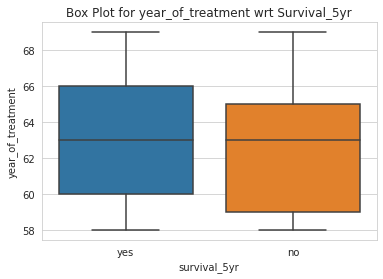

In [24]:
sns.boxplot(x= 'survival_5yr', y = 'year_of_treatment', data = data).set_title('Box Plot for year_of_treatment wrt Survival_5yr')
plt.show()
# Higher the no of year in which patient was treated, comparitively more probable are they to survive

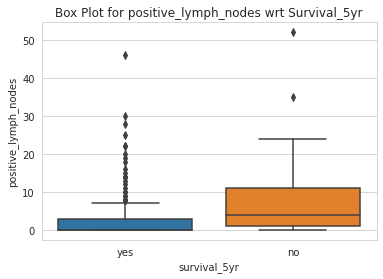

In [25]:
sns.boxplot(x= 'survival_5yr', y = 'positive_lymph_nodes', data = data).set_title('Box Plot for positive_lymph_nodes wrt Survival_5yr')
plt.show()
# 75% of the survived are have less than around 3 positive_lymph_nodes
# Also we can roughly say that for less than around 3 positive_lymph_nodes patients generally survive

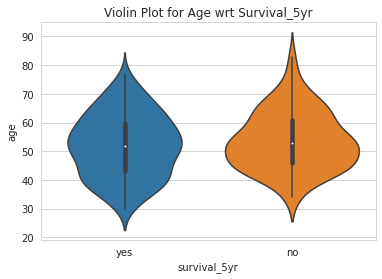

In [26]:
# Lets take another look using violin plot
sns.violinplot( x = 'survival_5yr', y = 'age', data = data, size =8).set_title('Violin Plot for Age wrt Survival_5yr')
plt.show()

Final conclusions
-> Not much can be inferred based on the present data

-> Existing features are not helping us to linearly separate the data

-> One feature from which we can draw most inference is positive_lymph_node, patient with less than around 3 positive lymph node are comparitively more likely to survive

-> We have to apply some complex statistical technique to make a classification, simple if else logic won't work to make a classification